In [1]:
import pandas as pd

# Context based on rule

In [47]:
label_count = pd.read_csv('object_count.csv',index_col=0)
range_index = label_count.index

In [48]:
for i in range_index:
    img = label_count.loc[i,]
    if (img.bowl>0) or (img.cup>0) or (img.bottle>0):
        label_count.loc[i,'context'] = 'feed'
    elif (img.couch>0) or (img['sports ball']>0) or (img['teddy bear']>0):
        label_count.loc[i,'context'] = 'play'
    elif (img.chair<=2) and (img.person>=5):
        label_count.loc[i,'context'] = 'class'
    elif (img.chair>2) and (img.person>=3):
        label_count.loc[i,'context'] = 'social'
    else:
        label_count.loc[i,'context'] = 'other'

In [50]:
label_count_mean = label_count.groupby('context').mean()
label_count_mean

,tennis racket,sports ball,chair,snowboard,bed,clock,cake,remote,refrigerator,motorcycle,...,handbag,airplane,surfboard,cell phone,suitcase,skateboard,cup,tv,sandwich,book
context,,,,,,,,,,,,,,,,,,,,,
class,0.000000,0.000000,1.024096,0.012048,0.048193,0.012048,0.012048,0.012048,0.048193,0.000000,...,0.036145,0.000000,0.012048,0.024096,0.036145,0.000000,0.000000,0.000000,0.000000,0.024096
feed,0.000000,0.025641,2.777778,0.000000,0.076923,0.000000,0.017094,0.008547,0.008547,0.000000,...,0.017094,0.000000,0.000000,0.034188,0.008547,0.017094,0.401709,0.017094,0.008547,0.111111
other,0.000000,0.000000,2.052632,0.000000,0.013158,0.000000,0.013158,0.000000,0.105263,0.013158,...,0.026316,0.000000,0.000000,0.026316,0.065789,0.026316,0.000000,0.026316,0.000000,0.052632
play,0.006024,0.078313,1.632530,0.000000,0.042169,0.006024,0.012048,0.012048,0.000000,0.000000,...,0.006024,0.000000,0.000000,0.036145,0.012048,0.024096,0.000000,0.000000,0.000000,0.162651
social,0.000000,0.000000,4.948148,0.000000,0.022222,0.014815,0.022222,0.000000,0.029630,0.000000,...,0.029630,0.007407,0.037037,0.029630,0.014815,0.007407,0.000000,0.044444,0.000000,0.029630


# WordCloud

In [49]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

#import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
label_count_mean.index

Index(['class', 'feed', 'other', 'play', 'social'], dtype='object', name='context')

In [53]:
label_dicts = [{}, {}, {}, {},{}]

for i in range(5):
    label_count = label_count_mean.iloc[i,]
    for key in label_count.index:
        label_dicts[i][key] = label_count.loc[key,]

In [60]:
def plot_wordcloud(label_dict,color,title):
    wc = WordCloud(background_color = 'white',
                   font_path=r"C:\Windows\Fonts\Arial.ttf",
                   width=400,height=400,mode='RGBA',
                   color_func=lambda *args, 
                   **kwargs: color).generate_from_frequencies(label_dict)

    plt.figure(figsize=(6,6))
    plt.title(title)
    plt.imshow(wc,interpolation="bilinear")  
    plt.axis("off")  
    plt.show()

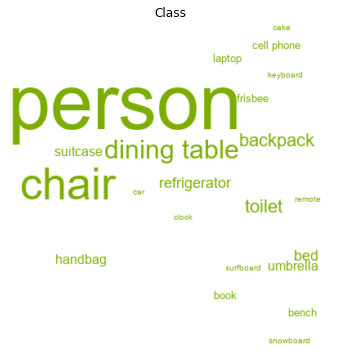

In [70]:
plot_wordcloud(label_dicts[0],color='#7CAE02',title='Class')

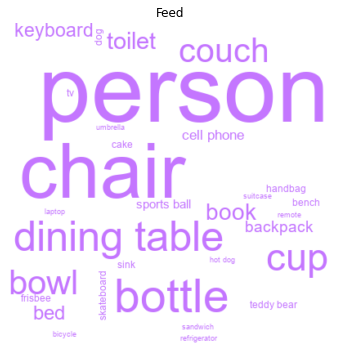

In [69]:
plot_wordcloud(label_dicts[1],color='#C476FF',title='Feed')

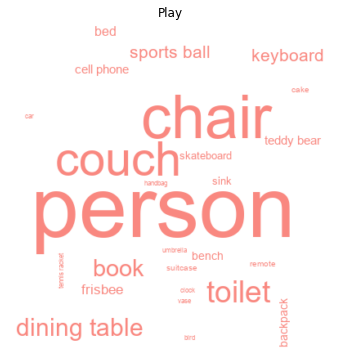

In [71]:
plot_wordcloud(label_dicts[3],color='#F98880',title='Play')

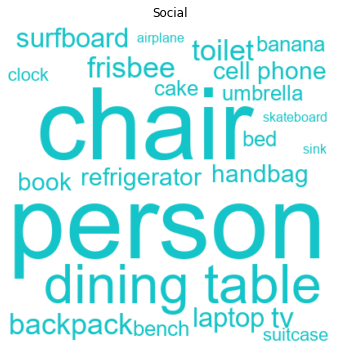

In [72]:
plot_wordcloud(label_dicts[4],color='#15C4C8',title='Social')